In [46]:
import pandas as pd

path = 'C:\\Users\\marsovc\\Desktop\\Fmf\\Dodiplomsko\\Financna 3. letnik\\Programiranje 1\\Projektna-naloga-PROG1\\podatki\\'

#združimo csvje v 2 df-ja: prihod in odhod
stolpci = ['Ime', 'Državljanstvo', 'Pozicija', 'Klub', 'Cena', 'Leto']
prihod = pd.DataFrame(columns=stolpci)
odhod = pd.DataFrame(columns=stolpci)

for i in range (2000,2020):
    transferIN = pd.read_csv(str(path+str(i)+'IN.csv'))
    prihod=prihod.append(transferIN)

    transferOUT = pd.read_csv(str(path+str(i)+'OUT.csv'))
    odhod=odhod.append(transferOUT)

In [64]:
#povprečna cena pristopa

avg_cena_prihod = []
avg_cena_odhod = []
stevilo_prihodov = []
stevilo_odhodov = []

for i in range (2000,2020):
    transferIN = pd.read_csv(str(path+str(i)+'IN.csv'))
    avg = sum(transferIN.Cena)/len(transferIN.Cena)
    avg_cena_prihod.append(float("%.2f" % avg))
    stevilo_prihodov.append(len(transferIN.Cena))
    
    
    transferOUT = pd.read_csv(str(path+str(i)+'OUT.csv'))
    avg = sum(transferOUT.Cena)/len(transferOUT.Cena)
    avg_cena_odhod.append(float("%.2f" % avg))
    stevilo_odhodov.append(len(transferOUT.Cena))

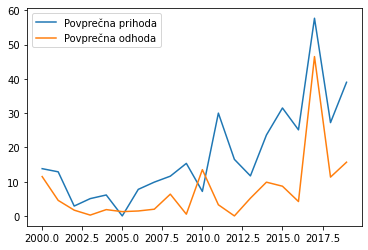

In [63]:
#poglejmo povprečno ceno prihodov in odhodov

%matplotlib inline
import matplotlib.pyplot as pypt

pypt.plot(range(2000,2020),avg_cena_prihod,label="Povprečna prihoda")
pypt.plot(range(2000,2020),avg_cena_odhod,label="Povprečna odhoda")
pypt.legend()
pypt.show()

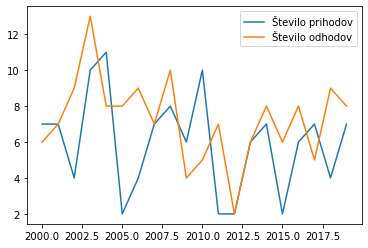

In [71]:
#Število prihodov in odhodov skozi leta
razlika = []
for i in range(len(stevilo_prihodov)):
    razlika.append(stevilo_prihodov[i]-stevilo_odhodov[i])

avg = sum(razlika)/len(razlika)
avg_razlika = []
for i in range(len(razlika)):
    avg_razlika.append(avg)


pypt.plot(range(2000,2020),stevilo_prihodov,label="Število prihodov")
pypt.plot(range(2000,2020),stevilo_odhodov,label="Število odhodov")
pypt.legend()
pypt.show()

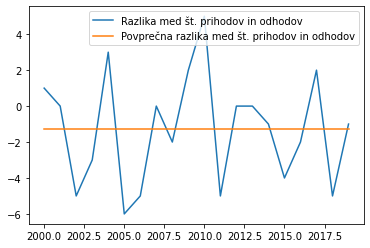

In [72]:
pypt.plot(range(2000,2020),razlika,label="Razlika med št. prihodov in odhodov")
pypt.plot(range(2000,2020),avg_razlika,label="Povprečna razlika med št. prihodov in odhodov")
pypt.legend()
pypt.show()

In [73]:
#sedaj poglejmo kolikšna je povprečna cena prestopa glede na državo

In [74]:
#sedaj poglejmo koliko je bilo prodanih glede na pozicijo